In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('PB_All_2000_2021.csv', sep=';', decimal=',')

In [4]:
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.33,2.77,12,12.3,9.5,0.057,154,0.454,289.5
1,1,11.05.2000,0.044,3,51.6,14.61,17.75,0.034,352,0.09,1792
2,1,11.09.2000,0.032,2.1,24.5,9.87,13.8,0.173,416,0.2,2509
3,1,13.12.2000,0.17,2.23,35.6,12.4,17.13,0.099,275.2,0.377,1264
4,1,02.03.2001,0,3.03,48.8,14.69,10,0.065,281.6,0.134,1462
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.8,0.038,160,0.726,77.85
2857,22,27.10.2020,0,1.52,0.5,11.26,0.56,0.031,147.2,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0,2.1,0,14.31,3.94,0.034,121.6,0.424,63.49


In [5]:
df.shape

(2861, 11)

In [6]:
df.describe()

,id
count,2861.000000
mean,12.397064
std,6.084226
min,1.000000
25%,8.000000
50%,14.000000
75%,16.000000
max,22.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.0,8.0,14.0,16.0,22.0


In [8]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [9]:
# date is in object - date format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.33,2.77,12,12.3,9.5,0.057,154,0.454,289.5
1,1,2000-05-11,0.044,3,51.6,14.61,17.75,0.034,352,0.09,1792
2,1,2000-09-11,0.032,2.1,24.5,9.87,13.8,0.173,416,0.2,2509
3,1,2000-12-13,0.17,2.23,35.6,12.4,17.13,0.099,275.2,0.377,1264
4,1,2001-03-02,0,3.03,48.8,14.69,10,0.065,281.6,0.134,1462
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.8,0.038,160,0.726,77.85
2857,22,2020-10-27,0,1.52,0.5,11.26,0.56,0.031,147.2,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0,2.1,0,14.31,3.94,0.034,121.6,0.424,63.49


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   object        
 3   BSK5       2860 non-null   object        
 4   Suspended  2845 non-null   object        
 5   O2         2858 non-null   object        
 6   NO3        2860 non-null   object        
 7   NO2        2858 non-null   object        
 8   SO4        2812 non-null   object        
 9   PO4        2833 non-null   object        
 10  CL         2812 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 246.0+ KB


In [11]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.33,2.77,12,12.3,9.5,0.057,154,0.454,289.5
1,1,2000-05-11,0.044,3,51.6,14.61,17.75,0.034,352,0.09,1792
2,1,2000-09-11,0.032,2.1,24.5,9.87,13.8,0.173,416,0.2,2509
3,1,2000-12-13,0.17,2.23,35.6,12.4,17.13,0.099,275.2,0.377,1264
4,1,2001-03-02,0,3.03,48.8,14.69,10,0.065,281.6,0.134,1462


In [12]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [13]:

df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.33,2.77,12,12.3,9.5,0.057,154,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3,51.6,14.61,17.75,0.034,352,0.09,1792,2000,5
2,1,2000-09-11,0.032,2.1,24.5,9.87,13.8,0.173,416,0.2,2509,2000,9
3,1,2000-12-13,0.17,2.23,35.6,12.4,17.13,0.099,275.2,0.377,1264,2000,12
4,1,2001-03-02,0,3.03,48.8,14.69,10,0.065,281.6,0.134,1462,2001,3


In [14]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [15]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

Week 2 - 23 June 2025

In [16]:
#df = df.dropna(subset=pollutants)
for col in pollutants:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric
    df[col] = df[col].fillna(df[col].mean())           # fill missing with mean

df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.33,2.77,12,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.1,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.17,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [17]:

df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            0
NO3           0
NO2           0
SO4           0
PO4           0
CL            0
year          0
month         0
dtype: int64

In [18]:
# Feature and target selection - Feature - independent variable and Target dependent variable
X = df[['id', 'year']]
y = df[pollutants]

In [19]:
# Encoding - onehotencoder - 22 stations - 1 - 1
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [20]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [21]:
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [22]:
# Evaluate model
y_pred = model.predict(X_test)

In [23]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
   MSE: 22.861110802060825
   R2: 0.007540039572995205

NO3:
   MSE: 17.765613544688055
   R2: 0.5194041858679409

NO2:
   MSE: 5.692627739774803
   R2: -7.247223037386126

SO4:
   MSE: 2688.4436530163603
   R2: 0.31966744857823437

PO4:
   MSE: 0.4466762565622493
   R2: 0.3512239952967634

CL:
   MSE: 34492.87945466878
   R2: 0.730477204034535



In [24]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  O2: 14.18
  NO3: 5.01
  NO2: 0.04
  SO4: 128.49
  PO4: 0.49
  CL: 64.78


In [25]:
import joblib

joblib.dump(model, 'Pollution_Model.pkl')
joblib.dump(X_encoded.columns.tolist(), "Model_Columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!


In [26]:
import datetime
with open("model_log.txt", "a") as f:
    f.write(f"\n--- Model Trained on {datetime.datetime.now()} ---\n")
    f.write(f"R2 Score: {r2_score(y_test, y_pred)}\n")
    f.write(f"MSE: {mean_squared_error(y_test, y_pred)}\n")
    f.write("-" * 50 + "\n")


In [27]:
def validate_input(input_df, required_columns):
    missing = [col for col in required_columns if col not in input_df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")
    return input_df


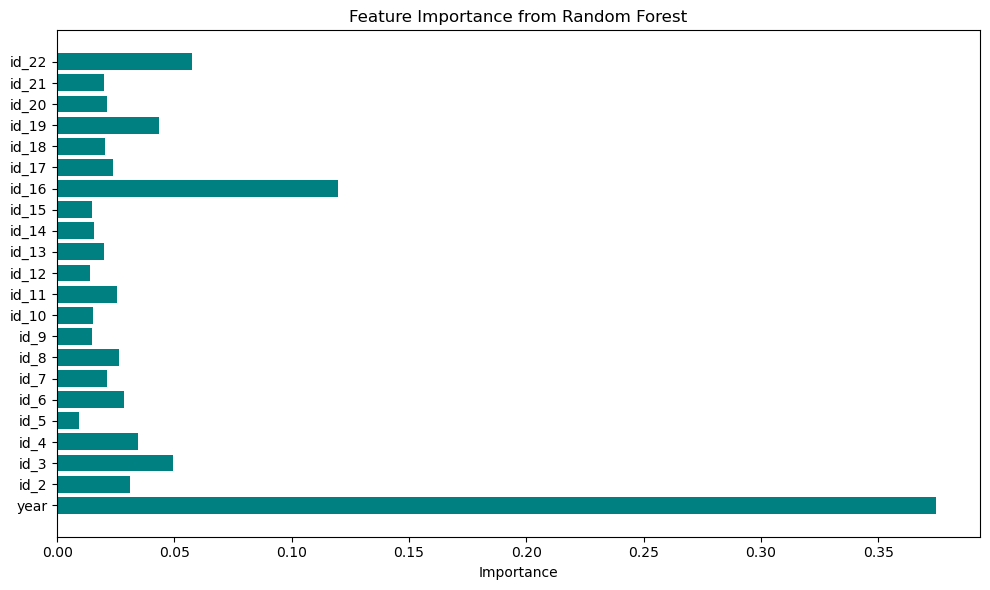

In [28]:
import matplotlib.pyplot as plt

importances = model.estimators_[0].feature_importances_
feature_names = X_encoded.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances, color='teal')
plt.xlabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()
